In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
crop_data=pd.read_csv("Crop_recommendation.csv")
crop_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
crop_data.shape


(2200, 8)

In [5]:
crop_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
crop_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
 crop_data.rename(columns = {'label':'Crop'}, inplace = True)
crop_data

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [8]:
# statistical inference of the dataset

crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
# Checking missing values of the dataset in each column
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
dtype: int64

In [10]:
crop_data = crop_data.dropna()
crop_data

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [11]:
crop_data.Crop.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [12]:
n = 5
crop_data['Crop'].value_counts()[:5].index.tolist()

['rice', 'maize', 'jute', 'cotton', 'coconut']

In [14]:
sns.barplot(crop_data["Crop"], crop_data["temperature"])
plt.xticks(rotation = 90)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

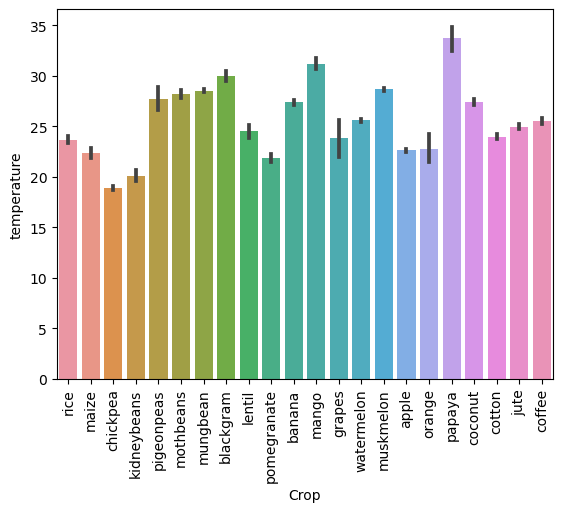

In [15]:
sns.barplot(x="Crop", y="temperature", data=crop_data)
plt.xticks(rotation=90)
plt.show()

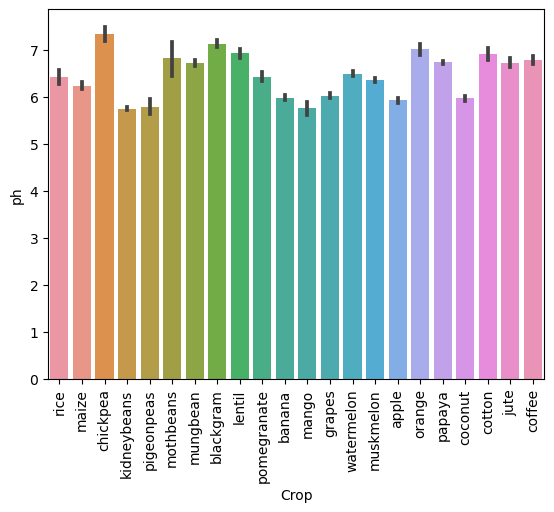

In [17]:
sns.barplot(x="Crop", y="ph", data=crop_data)
plt.xticks(rotation=90)
plt.show()

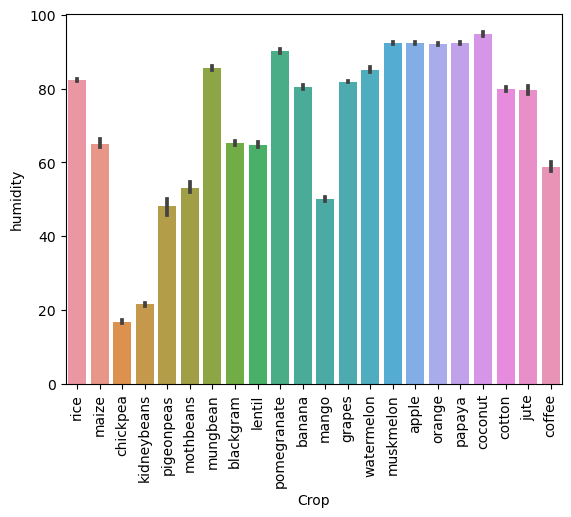

In [18]:
sns.barplot(x="Crop", y="humidity", data=crop_data)
plt.xticks(rotation=90)
plt.show()

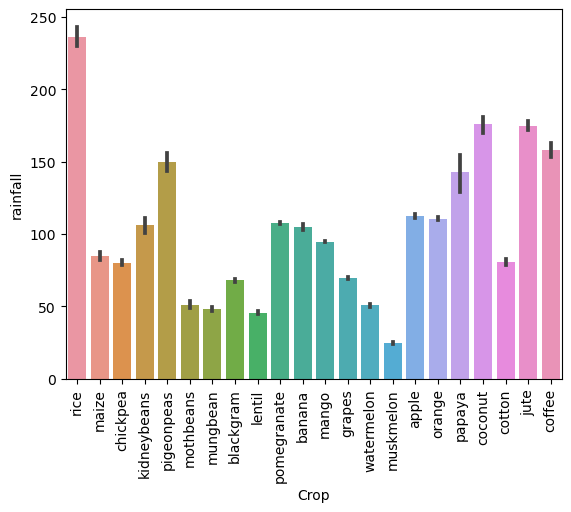

In [19]:
sns.barplot(x="Crop", y="rainfall", data=crop_data)
plt.xticks(rotation=90)
plt.show()

In [26]:
numeric_data = crop_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()


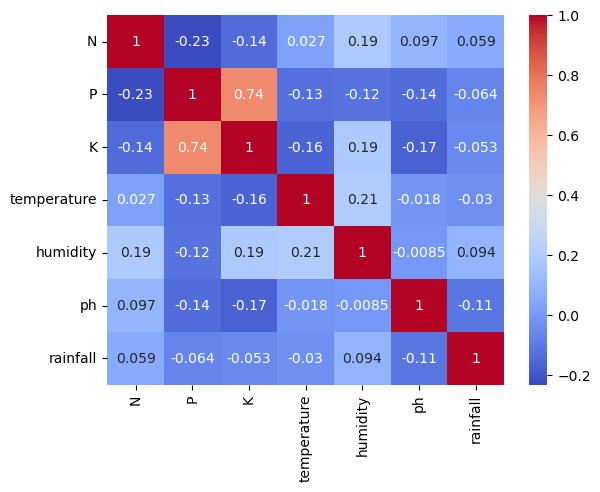

In [27]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [28]:
# shuffling the dataset to remove order
from sklearn.utils import shuffle

df  = shuffle(crop_data,random_state=5)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,Crop
1270,6,140,205,17.665584,82.929034,6.313086,69.867126,grapes
1481,98,22,47,29.072653,91.915332,6.341401,28.835684,muskmelon
1832,38,14,30,26.924495,91.201060,5.570745,194.902214,coconut
293,35,63,76,17.815645,17.607566,7.714153,90.820976,chickpea
1307,85,22,53,25.965342,89.770767,6.849472,59.463386,watermelon


In [29]:
x = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['Crop']

In [30]:
y = pd.get_dummies(target)
y

,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
1270,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1481,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1832,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
293,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1032,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2121,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1424,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [31]:
# Splitting data set - 25% test dataset and 75% 


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state= 0)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1650, 7)
x_test : (550, 7)
y_train : (1650, 22)
y_test : (550, 22)


In [32]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(x_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=1),
                      n_jobs=-1)

In [33]:
forest_pred = multi_target_forest.predict(x_test)
forest_pred

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

In [34]:
from sklearn.metrics import accuracy_score
a1 = accuracy_score(y_test, forest_pred)
print('Accuracy score:', accuracy_score(y_test, forest_pred))

Accuracy score: 0.98


In [35]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(multi_target_forest,X = x_train, y = y_train,cv=5)
score

array([0.97575758, 0.96666667, 0.95454545, 0.96666667, 0.96969697])

In [36]:
b1 = "{:.2f}".format(score.mean()*100)
b1 = float(b1)
b1

c1 = (score.std()*100)
c1

0.6910154091509904

In [37]:
print("Accuracy : {:.2f}%".format (score.mean()*100))
print("Standard Deviation : {:.2f}%".format(score.std()*100))

Accuracy : 96.67%
Standard Deviation : 0.69%


In [38]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=6)
multi_target_decision = MultiOutputClassifier(clf, n_jobs=-1)
multi_target_decision.fit(x_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=6),
                      n_jobs=-1)

In [39]:
decision_pred = multi_target_decision.predict(x_test)
decision_pred



array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

In [40]:
from sklearn.metrics import accuracy_score
a2 = accuracy_score(y_test,decision_pred)
print('Accuracy score:', accuracy_score(y_test,decision_pred))
a2

Accuracy score: 0.9454545454545454


0.9454545454545454

In [41]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Create a Grid Search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=1), 
                           param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best parameters:", best_params)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Users/khaledaliahmed/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/khaledaliahmed/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/khaledaliahmed/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/khaledaliahmed/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_p

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}


In [42]:
best_forest = RandomForestClassifier(**best_params, random_state=1)
multi_target_best_forest = MultiOutputClassifier(best_forest, n_jobs=-1)
multi_target_best_forest.fit(x_train, y_train)

# Evaluate the model
best_forest_pred = multi_target_best_forest.predict(x_test)
print('Improved Accuracy:', accuracy_score(y_test, best_forest_pred))


Improved Accuracy: 0.9854545454545455


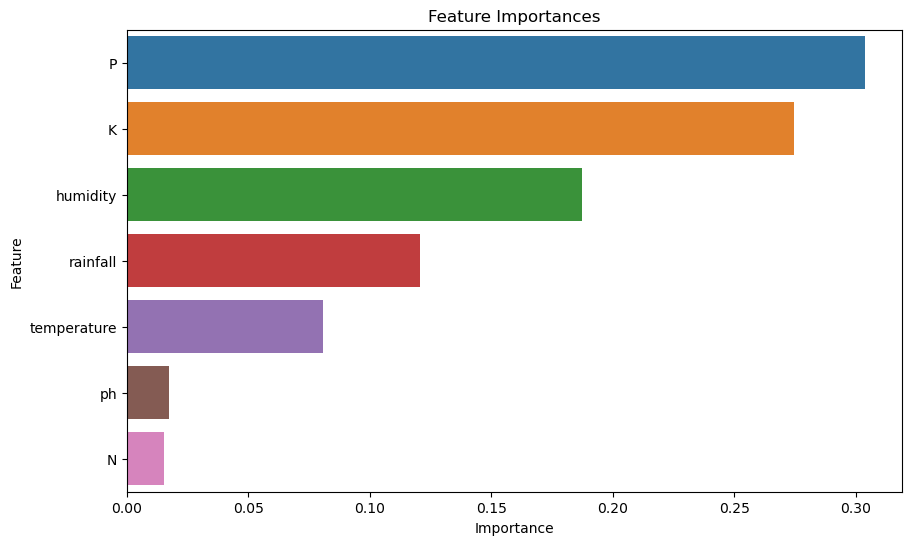

In [43]:
feature_importances = multi_target_best_forest.estimators_[0].feature_importances_
features = x_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()


In [44]:
import joblib

# Saving the model
joblib.dump(multi_target_best_forest, 'crop_recommendation_model.pkl')



['crop_recommendation_model.pkl']

In [45]:
import joblib

# Load the model
model = joblib.load('crop_recommendation_model.pkl')


In [46]:
def recommend_crop(N, P, K, temperature, humidity, pH, rainfall):
    # Create a DataFrame with the input values
    input_data = pd.DataFrame([[N, P, K, temperature, humidity, pH, rainfall]],
                              columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
    
    # Predict the crop
    prediction = model.predict(input_data)

    # Convert prediction to crop name
    predicted_crop = pd.get_dummies(target).columns[np.argmax(prediction, axis=1)][0]

    return predicted_crop


In [47]:
# Example values: N=90, P=40, K=40, temperature=25, humidity=80, pH=6.5, rainfall=100
recommended_crop = recommend_crop(90, 40, 40, 25, 80, 6.5, 100)
print(f"The recommended crop is: {recommended_crop}")


The recommended crop is: apple
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.6s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=200; total time=   0.6s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=300; total time=   1.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, n_estimators=300; total time=   1.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=8, max_features=log2, n_estimators=300; total time=   1.1s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max

[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=200; total time=   0.6s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200; total time=   0.7s
[CV] END criterion=gini, max_depth=6, max_features=log2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=6, max_features=log2, n_estimators=300; total time=   1.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=8, max_features=log2, n_estimators=200; total time=   0.8s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.8s
[CV] END criterion=gini, max_depth=10, max_features=log2, n